# Analysis of sold new cars in Estonia 2020

Data is taken from official source - https://www.transpordiamet.ee/soidukitega-tehtud-toimingute-statistika

Period - from 01.2020 till 12.2020.

Only new cars where used in this analysis.


# Findings
1. 19285 cars were sold for this period.
2. ~54% petrol, ~25% diesel, ~615% hybrid cars...
3. ~25% has engine capacity of ~2.0 liters, ~24% ~1.5 liters, ~10% ~1.0 liters, ...
4. Most popular brands/marks in Estonia: TOYOTA, SKODA, RENAULT, KIA, VOLKSWAGEN...
5. ~45% of all cars are SUVs
6. Corporate clients buy cheaper cars with smaller engines(ex. Renault Clio), private clients buy more expensive cars with bigger engines(ex. Toyota Rav4)
7. People from different cities buy different cars.
8. Most popular car in Estonia: TOYOTA RAV4

In [127]:
%reload_ext autoreload
%autoreload 0

import os

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [128]:
from mnt_sum import get_summary
df_o = get_summary('data/2020')
df_o.describe()

,Väljalaske aasta,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Arv,Esm reg aasta,Registrimass
count,8114.0,14080.000000,14080.000000,13999.000000,12888.000000,14080.000000,14080.0,14080.000000,14080.000000,5966.000000,5966.000000
mean,2020.0,1696.444247,115.351314,128.907851,2086.449953,1613.712003,2.0,5.154759,1.369673,2019.999497,2064.761817
std,0.0,603.124613,48.300086,35.819529,388.209920,333.034931,0.0,0.689422,2.381190,0.038840,367.068976
min,2020.0,0.000000,25.300000,0.000000,1240.000000,927.000000,2.0,2.000000,1.000000,2017.000000,1260.000000
25%,2020.0,1373.000000,88.000000,109.000000,1845.000000,1407.000000,2.0,5.000000,1.000000,2020.000000,1837.000000
50%,2020.0,1580.000000,110.000000,127.000000,2000.000000,1541.000000,2.0,5.000000,1.000000,2020.000000,1990.000000
75%,2020.0,1984.000000,130.000000,144.000000,2207.000000,1720.000000,2.0,5.000000,1.000000,2020.000000,2189.000000
max,2020.0,6749.000000,585.000000,473.000000,5600.000000,4985.000000,2.0,9.000000,113.000000,2020.000000,5500.000000


In [129]:
df_o.head()

,Kategooria,Mark,Mudel,Keretüüp,Väljalaske aasta,Mootori tüüp,Mootori maht,Mootori võimsus,CO2,Täismass,Tühimass,Telgi kokku,Istekohti,Maakond,Linn,Tüüp,Arv,Esm reg aasta,Registrimass,Värv
74,M1,AUDI,A1 SPORTBACK,LUUKPÄRA,2020,BENSIIN_KATALYSAATOR,999,85.0,117,1680,1217,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
75,M1,AUDI,A4 AVANT,UNIVERSAAL,2020,DIISEL,1968,140.0,139,2230,1788,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>
76,M1,AUDI,A4 LIMOUSINE,SEDAAN,2020,BENSIIN_HYBRIID,1984,110.0,137,2035,1614,2,5,Jõgeva maakond,Määramata,Füüsiline,1,<NA>,<NA>,<NA>
77,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,BENSIIN_HYBRIID,1984,140.0,135,2055,1636,2,5,Harju maakond,Tallinn,Füüsiline,1,<NA>,<NA>,<NA>
78,M1,AUDI,A5 SPORTBACK,LUUKPÄRA,2020,DIISEL,1968,110.0,118,2120,1703,2,5,Harju maakond,Tallinn,Juriidiline,1,<NA>,<NA>,<NA>


In [130]:
df = df_o[['Mark', 'Mudel', 'Mootori tüüp', 'Mootori maht', 'Mootori võimsus',
       'Linn', 'Tüüp', 'Arv']]

df.head()

,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1


# Adding additional data

In [131]:
df['model'] = df['Mark'] + ' ' + df['Mudel']
df.head()

/tmp/ipykernel_228482/2682016276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model'] = df['Mark'] + ' ' + df['Mudel']


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1,AUDI A4 AVANT
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1,AUDI A4 LIMOUSINE
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1,AUDI A5 SPORTBACK
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1,AUDI A5 SPORTBACK


In [132]:
import yaml
from utils.file import read_file

SUVS = set(yaml.safe_load(read_file("data/suvs.yaml").lower()))

df['SUV'] = df['model'].str.lower().isin(SUVS)
df[df['SUV']].sample(5)

/tmp/ipykernel_228482/303451227.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SUV'] = df['model'].str.lower().isin(SUVS)


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV
1040,VOLKSWAGEN,TIGUAN,BENSIIN_KATALYSAATOR,1984,140.0,Tallinn,Füüsiline,1,VOLKSWAGEN TIGUAN,True
375,KIA,SPORTAGE,BENSIIN_KATALYSAATOR,1591,97.0,Määramata,Füüsiline,1,KIA SPORTAGE,True
1257,VOLKSWAGEN,TOUAREG,DIISEL,2967,210.0,Tartu,Juriidiline,2,VOLKSWAGEN TOUAREG,True
451,PEUGEOT,3008,DIISEL,1499,96.0,Tallinn,Juriidiline,1,PEUGEOT 3008,True
762,SKODA,KODIAQ,BENSIIN_KATALYSAATOR,1498,110.0,Tallinn,Füüsiline,1,SKODA KODIAQ,True


In [133]:
from decimal import *

def round(number, digit=0):
    return float(Decimal(number).quantize(Decimal(str(1/10**digit)), ROUND_HALF_UP))

df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \
              + df['Mootori tüüp'].map(lambda x: x.replace('kat.', '').strip()).map(str) + ', ' \
              + df['Mootori maht'].map(lambda x: round(x / 1000, 1)).map(str) + ' cm3, ' \
              + df['Mootori võimsus'].map(lambda x: int(x)).map(str) + ' kW)'
df.head()

/tmp/ipykernel_228482/3185011425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['full model'] = df['Mark'] + ' ' + df['Mudel'] + '(' \


,Mark,Mudel,Mootori tüüp,Mootori maht,Mootori võimsus,Linn,Tüüp,Arv,model,SUV,full model
74,AUDI,A1 SPORTBACK,BENSIIN_KATALYSAATOR,999,85.0,Tallinn,Juriidiline,1,AUDI A1 SPORTBACK,False,"AUDI A1 SPORTBACK(BENSIIN_KATALYSAATOR, 1.0 cm..."
75,AUDI,A4 AVANT,DIISEL,1968,140.0,Tallinn,Juriidiline,1,AUDI A4 AVANT,False,"AUDI A4 AVANT(DIISEL, 2.0 cm3, 140 kW)"
76,AUDI,A4 LIMOUSINE,BENSIIN_HYBRIID,1984,110.0,Määramata,Füüsiline,1,AUDI A4 LIMOUSINE,False,"AUDI A4 LIMOUSINE(BENSIIN_HYBRIID, 2.0 cm3, 11..."
77,AUDI,A5 SPORTBACK,BENSIIN_HYBRIID,1984,140.0,Tallinn,Füüsiline,1,AUDI A5 SPORTBACK,False,"AUDI A5 SPORTBACK(BENSIIN_HYBRIID, 2.0 cm3, 14..."
78,AUDI,A5 SPORTBACK,DIISEL,1968,110.0,Tallinn,Juriidiline,1,AUDI A5 SPORTBACK,False,"AUDI A5 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)"


# Total sold cars

In [134]:
df['Arv'].sum()

19285

# Popular fuels

                        Arv
Mootori tüüp               
BENSIIN_KATALYSAATOR  10334
DIISEL                 4882
BENSIIN_HYBRIID        2566
CNG                     664
ELEKTER                 344
BENSIIN                 259
DIISEL_HYBRIID          236


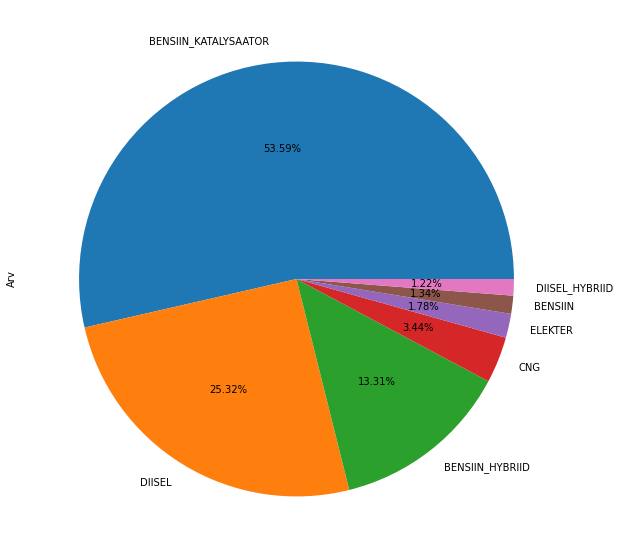

In [135]:
def show_pie(dataframe, groupby, index = None):
    plt.figure(figsize=(10, 10))
    dataframe = dataframe.groupby(
        [groupby], 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)
    if index:
        dataframe.index = index
    else:
        dataframe = dataframe.set_index(groupby)
    dataframe['Arv'].plot.pie(autopct='%1.2f%%')
    print(dataframe)

show_pie(df, 'Mootori tüüp')

# Engine capacities

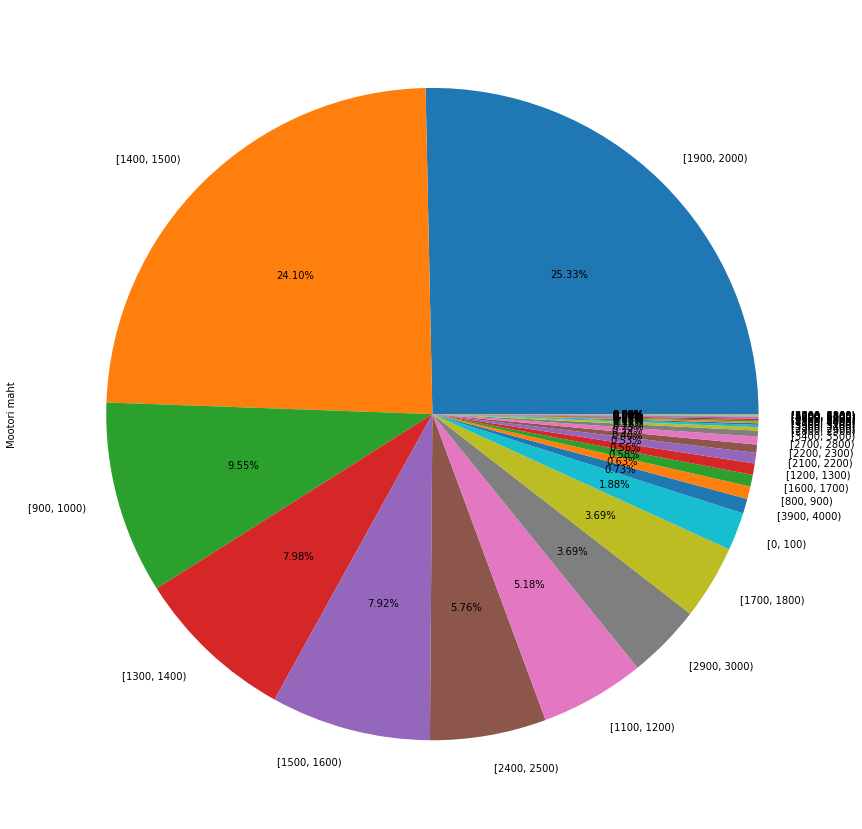

In [136]:
plt.figure(figsize=(15, 15))

bins = range(df['Mootori maht'].min(), df['Mootori maht'].max() + 100, 100)
capacities = pd.cut(df['Mootori maht'], bins, right=False).value_counts()
capacities.plot(kind='pie', autopct='%1.2f%%')
pass

# Top 10 popular manufacturers

Two charts might be displayed:
* 'model' - data is grouped by mark and model
* 'full model' - data is grouped by mark, model and engine

          Mark   Arv
1       TOYOTA  3362
2        SKODA  2884
3      RENAULT  2021
4          KIA  1259
5   VOLKSWAGEN  1197
6      PEUGEOT  1173
7      CITROEN  1161
8        DACIA   706
9      HYUNDAI   621
10       HONDA   563


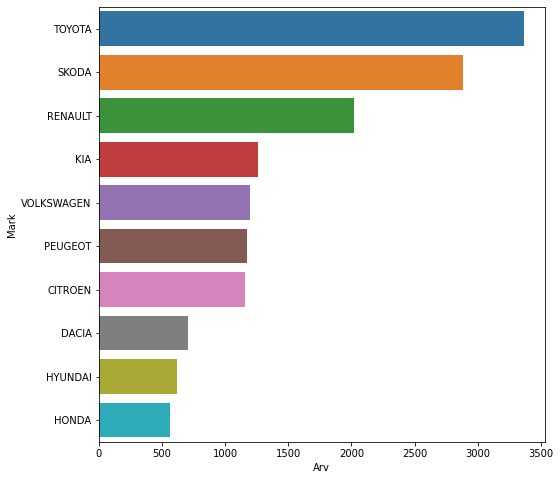

In [137]:
LIMIT = 10

def group_and_sort(data_frame, selection):
    return data_frame.groupby(
        selection, 
        as_index=False
    )['Arv'].sum().sort_values('Arv', ascending=False).reset_index(drop=True)

def group_sort_and_plot(data_frame, selection, x='Arv', y=None, limit=LIMIT, plot=True):
    data = group_and_sort(data_frame, selection)
    data.index += 1 
    y = selection[0] if y is None else y
    if plot:
        plt.figure(figsize=(8, 8))
        sns.barplot(x=x, y=y, data=data[:limit], orient='h')
    print(data.head(limit))
    
group_sort_and_plot(df, ['Mark'])

## Top 10 popular car models

               model   Arv
1        TOYOTA RAV4  1400
2      SKODA OCTAVIA  1049
3     TOYOTA COROLLA   977
4       RENAULT CLIO   942
5   CITROEN BERLINGO   601
6       SKODA KODIAQ   536
7           KIA CEED   403
8       KIA SPORTAGE   399
9       SKODA SUPERB   336
10      DACIA DUSTER   327


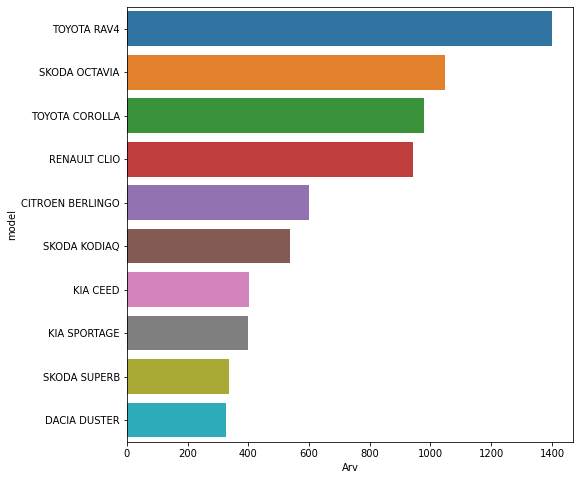

In [138]:
group_sort_and_plot(df, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  679
3       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
4            CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  467
5     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  456
6              SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  359
7                  SKODA OCTAVIA(CNG, 1.5 cm3, 96 kW)  315
8   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  273
9                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
10  SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  231


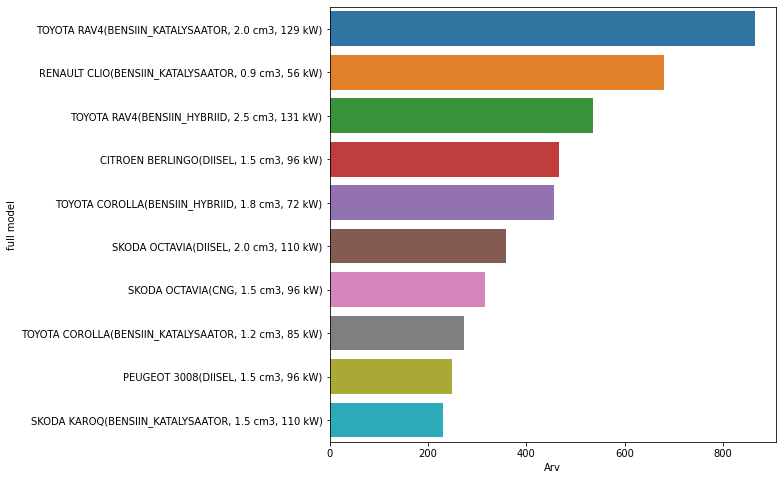

In [139]:
group_sort_and_plot(df, ['full model'])

### Top 10 popular diesel models

                  model  Arv
1      CITROEN BERLINGO  506
2         SKODA OCTAVIA  392
3          SKODA KODIAQ  266
4          PEUGEOT 3008  250
5          PEUGEOT 2008  182
6          KIA SPORTAGE  166
7          PEUGEOT 5008  153
8     AUDI Q3 SPORTBACK  138
9   CITROEN C5 AIRCROSS  125
10         SKODA SUPERB  123


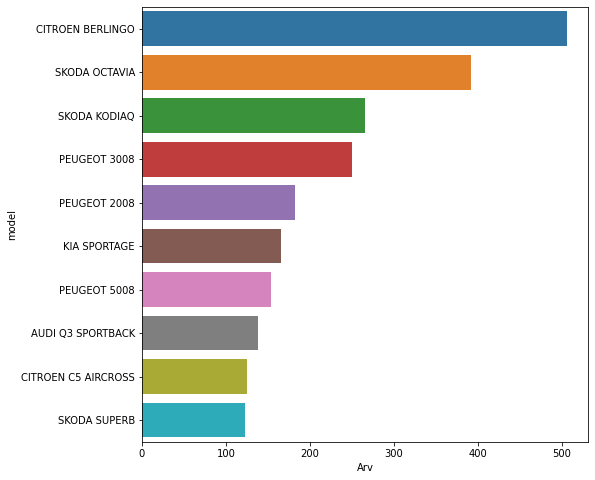

In [140]:
df_diesel = df[df['Mootori tüüp'] == 'DIISEL']

group_sort_and_plot(df_diesel, ['model'])

                                     full model  Arv
1      CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  467
2        SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  359
3          PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
4         SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  176
5          PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)  151
6          PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  148
7         KIA SPORTAGE(DIISEL, 1.6 cm3, 100 kW)  131
8    AUDI Q3 SPORTBACK(DIISEL, 2.0 cm3, 110 kW)  119
9        RENAULT KADJAR(DIISEL, 1.5 cm3, 85 kW)  117
10  CITROEN C5 AIRCROSS(DIISEL, 1.5 cm3, 96 kW)  111


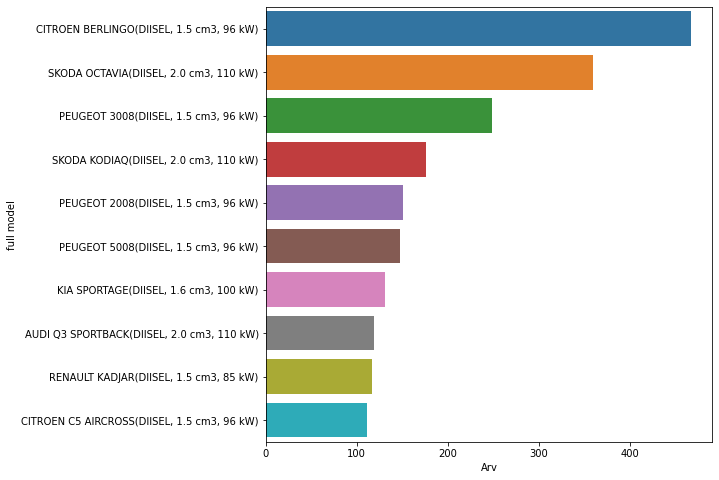

In [141]:
group_sort_and_plot(df_diesel, ['full model'])

### Top 10 popular petrol models

             model  Arv
1     RENAULT CLIO  941
2      TOYOTA RAV4  864
3   TOYOTA COROLLA  486
4         KIA CEED  320
5    SKODA OCTAVIA  291
6     SKODA KODIAQ  270
7    DACIA SANDERO  247
8      SKODA KAROQ  245
9   RENAULT CAPTUR  239
10    DACIA DUSTER  239


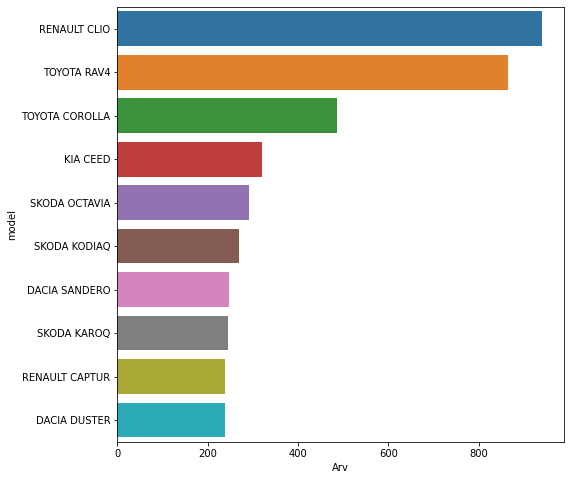

In [142]:
df_petrol = df[df['Mootori tüüp'].isin(['BENSIIN_KATALYSAATOR', 'BENSIIN'])]

group_sort_and_plot(df_petrol, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  679
3   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  273
4   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  231
5     KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)  226
6   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  213
7   SKODA OCTAVIA(BENSIIN_KATALYSAATOR, 1.5 cm3, 1...  209
8   VOLKSWAGEN PASSAT(BENSIIN_KATALYSAATOR, 1.5 cm...  198
9   DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 7...  192
10  SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  189


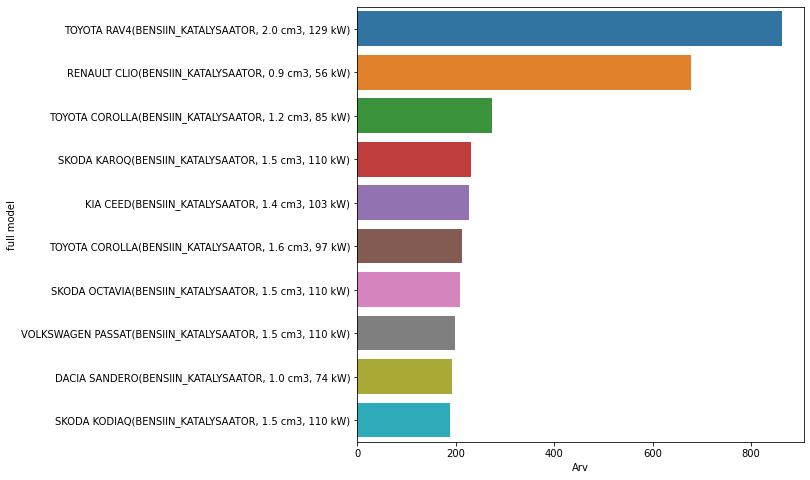

In [143]:
group_sort_and_plot(df_petrol, ['full model'])

### Top 10 popular hybrid models(diesel and petrol)


              model  Arv
1       TOYOTA RAV4  536
2    TOYOTA COROLLA  491
3       TOYOTA C-HR  211
4      TOYOTA CAMRY  176
5        HONDA CR-V  115
6   SUBARU FORESTER   77
7           MAZDA 3   76
8        VOLVO XC60   59
9     SKODA OCTAVIA   51
10  VOLKSWAGEN GOLF   48


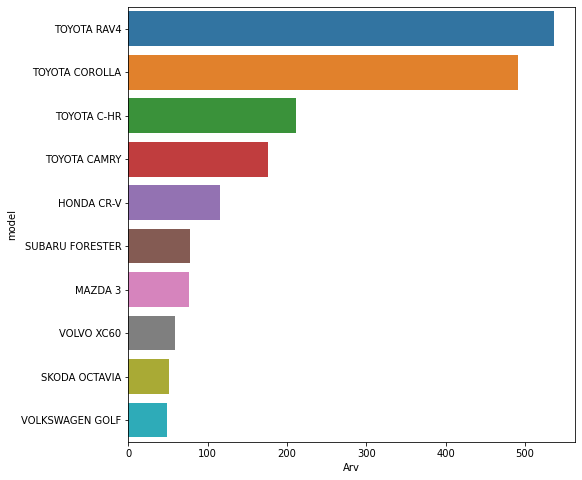

In [144]:
df_hybrids = df[df['Mootori tüüp'].apply(lambda x: 'HYBRIID' in x)]

group_sort_and_plot(df_hybrids, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
2     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  456
3        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
4      TOYOTA CAMRY(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  176
5        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  115
6   SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)   77
7   VOLKSWAGEN GOLF(BENSIIN_HYBRIID, 1.5 cm3, 110 kW)   48
8       TOYOTA YARIS(BENSIIN_HYBRIID, 1.5 cm3, 68 kW)   47
9   TOYOTA YARIS HYBRID(BENSIIN_HYBRIID, 1.5 cm3, ...   43
10          MAZDA 3(BENSIIN_HYBRIID, 2.0 cm3, 132 kW)   43


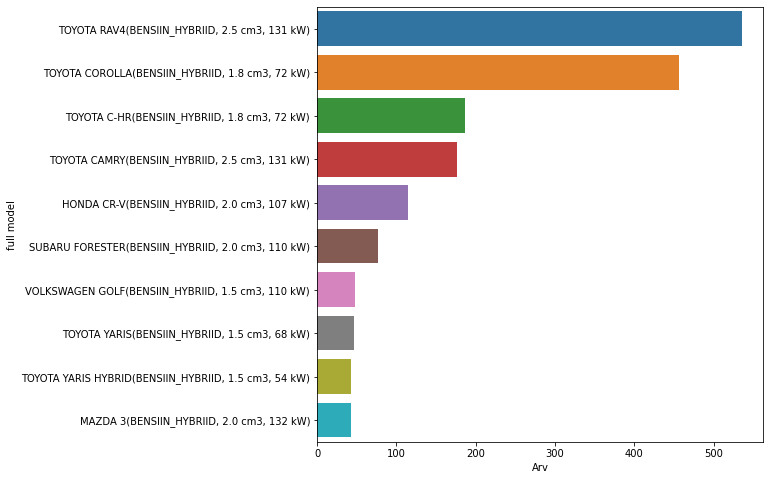

In [145]:
group_sort_and_plot(df_hybrids, ['full model'])

### Top 10 popular electric models

                         model  Arv
1                 HYUNDAI KONA   58
2            NISSAN LEAF 62KWH   35
3                  RENAULT ZOE   33
4            NISSAN LEAF 40KWH   21
5                TESLA MODEL 3   20
6            PORSCHE TAYCAN 4S   19
7               VOLKSWAGEN UP!   18
8                      HONDA E   17
9                  PEUGEOT 208   15
10  VOLKSWAGEN ID.3 PRO 150 KW   15


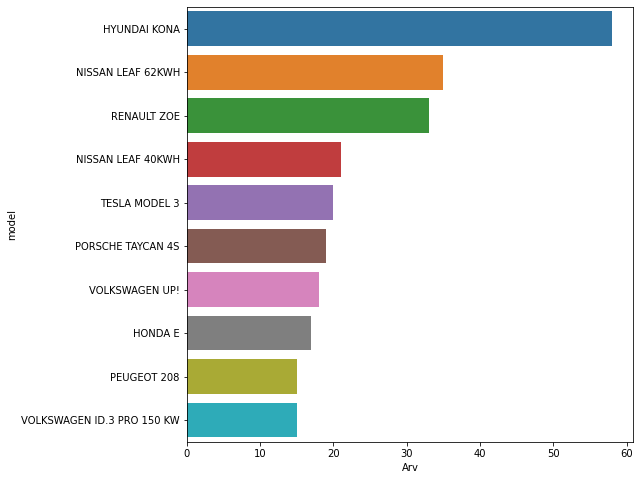

In [146]:
df['Mootori tüüp'].unique()
df_electric = df[df['Mootori tüüp'] == 'ELEKTER']

group_sort_and_plot(df_electric, ['model'])

                                           full model  Arv
1               HYUNDAI KONA(ELEKTER, 0.0 cm3, 28 kW)   54
2          NISSAN LEAF 62KWH(ELEKTER, 0.0 cm3, 90 kW)   35
3                RENAULT ZOE(ELEKTER, 0.0 cm3, 51 kW)   32
4          NISSAN LEAF 40KWH(ELEKTER, 0.0 cm3, 90 kW)   21
5             VOLKSWAGEN UP!(ELEKTER, 0.0 cm3, 61 kW)   18
6                    HONDA E(ELEKTER, 0.0 cm3, 60 kW)   17
7   VOLKSWAGEN ID.3 PRO 150 KW(ELEKTER, 0.0 cm3, 7...   15
8                PEUGEOT 208(ELEKTER, 0.0 cm3, 57 kW)   15
9               SKODA CITIGO(ELEKTER, 0.0 cm3, 61 kW)   14
10        PORSCHE TAYCAN 4S(ELEKTER, 0.0 cm3, 140 kW)   14


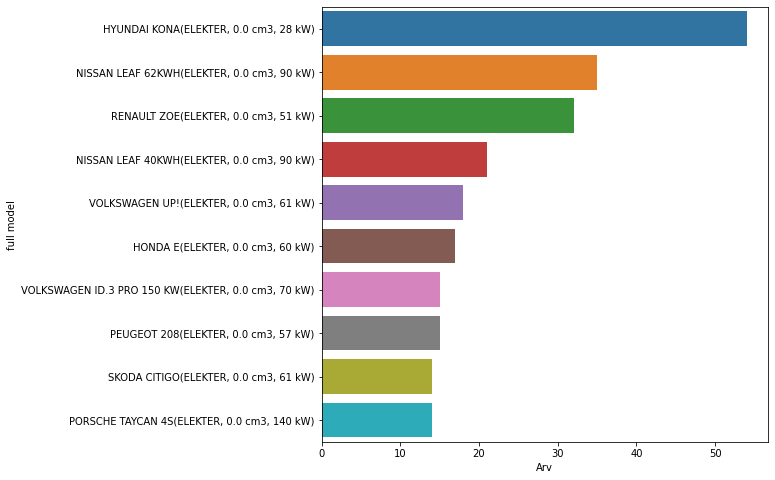

In [147]:
group_sort_and_plot(df_electric, ['full model'])

### Top 10 popular cars by private owners

                model  Arv
1         TOYOTA RAV4  694
2       SKODA OCTAVIA  596
3      TOYOTA COROLLA  458
4        SKODA KODIAQ  330
5         SKODA KAMIQ  242
6        KIA SPORTAGE  202
7   VOLKSWAGEN TIGUAN  195
8         TOYOTA C-HR  191
9            KIA CEED  184
10        SKODA KAROQ  170


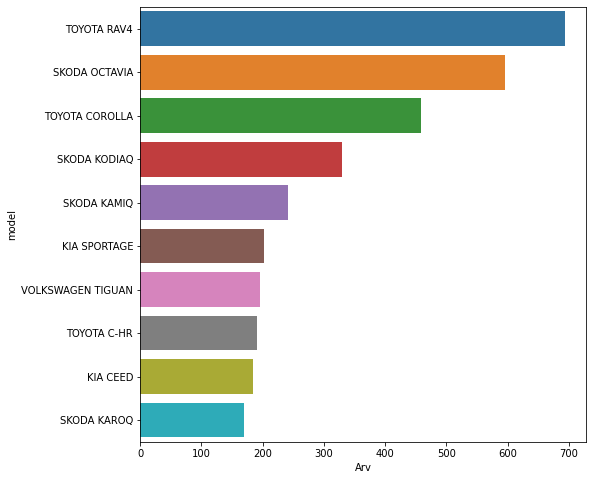

In [148]:
df_private = df[df['Tüüp'].apply(lambda x: 'Füüsiline' in x)]

group_sort_and_plot(df_private, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  403
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  291
3     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  197
4                  SKODA OCTAVIA(CNG, 1.5 cm3, 96 kW)  171
5   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  169
6              SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  165
7   SKODA OCTAVIA(BENSIIN_KATALYSAATOR, 1.5 cm3, 1...  148
8   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  137
9   TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  132
10  TOYOTA YARIS(BENSIIN_KATALYSAATOR, 1.5 cm3, 82...  114


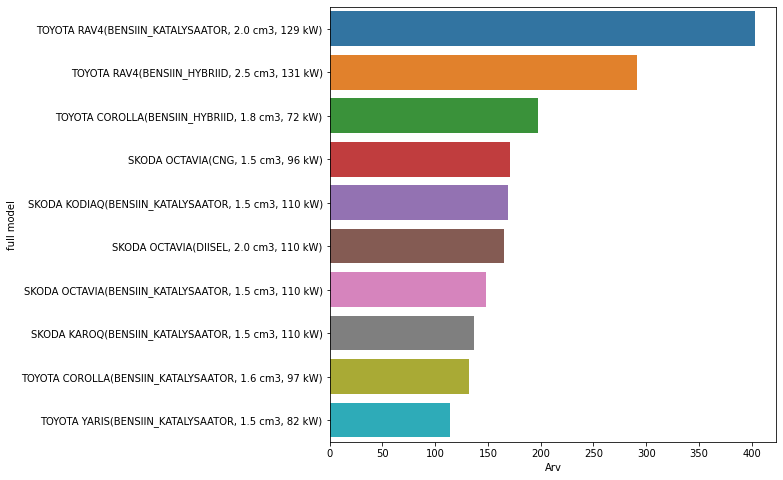

In [149]:
group_sort_and_plot(df_private, ['full model'])

### Top 10 popular cars by company owners

               model  Arv
1       RENAULT CLIO  895
2        TOYOTA RAV4  706
3   CITROEN BERLINGO  533
4     TOYOTA COROLLA  519
5      SKODA OCTAVIA  453
6     RENAULT CAPTUR  272
7       PEUGEOT 3008  250
8     RENAULT MEGANE  228
9           KIA CEED  219
10     DACIA SANDERO  216


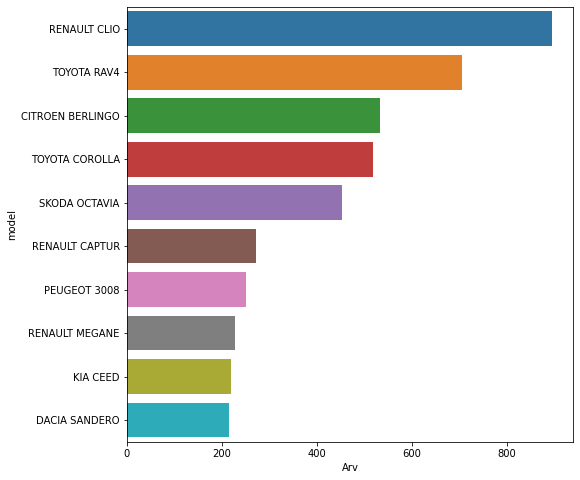

In [150]:
df_corporate = df[df['Tüüp'].apply(lambda x: 'Füüsiline' not in x)]

group_sort_and_plot(df_corporate, ['model'])

                                           full model  Arv
1   RENAULT CLIO(BENSIIN_KATALYSAATOR, 0.9 cm3, 56...  671
2   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  461
3            CITROEN BERLINGO(DIISEL, 1.5 cm3, 96 kW)  436
4     TOYOTA COROLLA(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  259
5       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  245
6                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  228
7              SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)  194
8   DACIA SANDERO(BENSIIN_KATALYSAATOR, 1.0 cm3, 7...  176
9   RENAULT MEGANE(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  162
10  TOYOTA COROLLA(BENSIIN_KATALYSAATOR, 1.2 cm3, ...  160


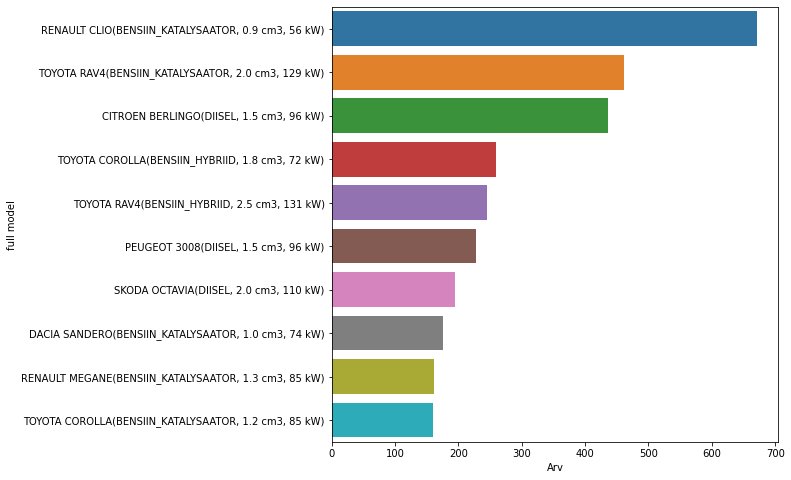

In [151]:
group_sort_and_plot(df_corporate, ['full model'])

### SUV vs non SUV

           SUV    Arv
non-SUV  False  10654
SUV       True   8631


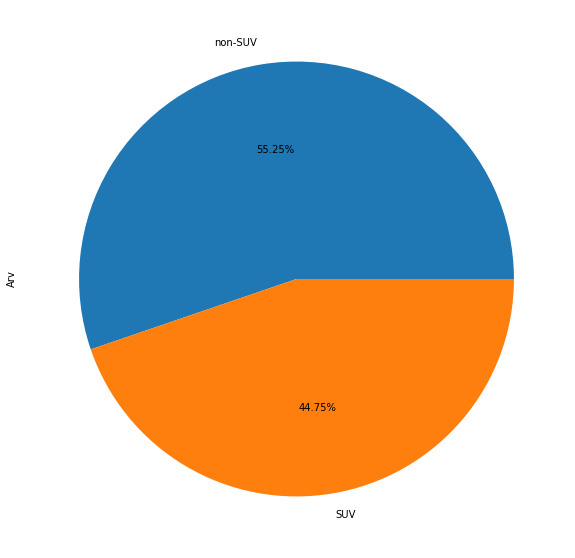

In [152]:
show_pie(df, 'SUV', index=['non-SUV', 'SUV'])

### Popular fuels in SUV

                       Arv
Mootori tüüp              
BENSIIN_KATALYSAATOR  4912
DIISEL                2151
BENSIIN_HYBRIID       1201
DIISEL_HYBRIID         163
CNG                    111
ELEKTER                 83
BENSIIN                 10


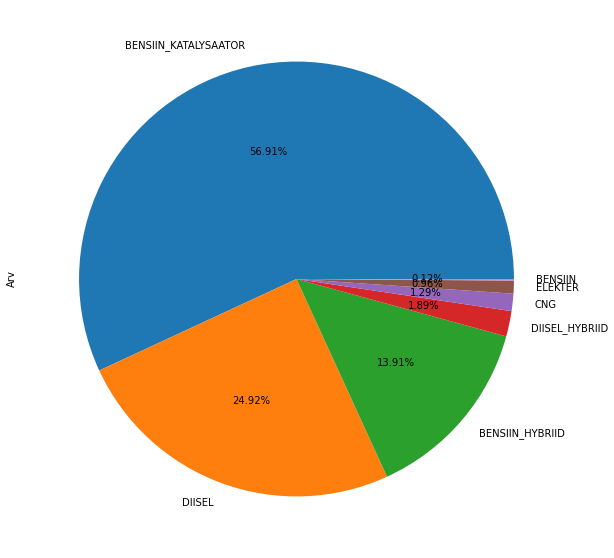

In [153]:
df_suv = df[df['SUV']]

show_pie(df_suv, 'Mootori tüüp')

### Top 10 popular SUV

                model   Arv
1         TOYOTA RAV4  1400
2        SKODA KODIAQ   536
3        KIA SPORTAGE   399
4        DACIA DUSTER   327
5      RENAULT CAPTUR   322
6         TOYOTA C-HR   321
7         SKODA KAMIQ   314
8         SKODA KAROQ   291
9        PEUGEOT 3008   289
10  VOLKSWAGEN TIGUAN   288


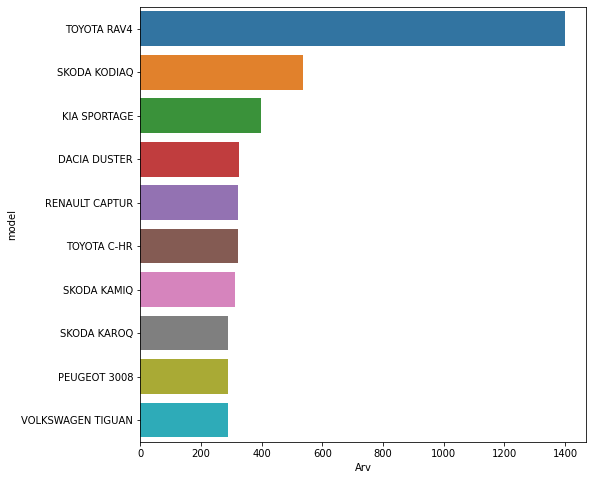

In [154]:
group_sort_and_plot(df_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
3                PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
4   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  231
5   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  189
6        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
7   HYUNDAI TUCSON(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  176
8               SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  176
9   RENAULT MEGANE(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  174
10  KIA SPORTAGE(BENSIIN_KATALYSAATOR, 1.6 cm3, 13...  160


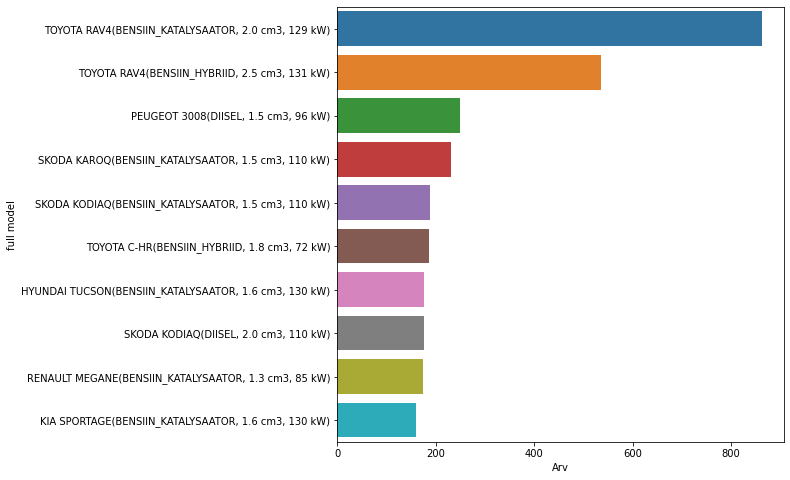

In [155]:
group_sort_and_plot(df_suv, ['full model'])

### Top 10 popular Diesel SUV

                  model  Arv
1          SKODA KODIAQ  266
2          PEUGEOT 3008  250
3          PEUGEOT 2008  182
4          KIA SPORTAGE  166
5          PEUGEOT 5008  153
6   CITROEN C5 AIRCROSS  125
7        RENAULT KADJAR  120
8     VOLKSWAGEN TIGUAN  117
9          DACIA DUSTER   88
10       RENAULT CAPTUR   77


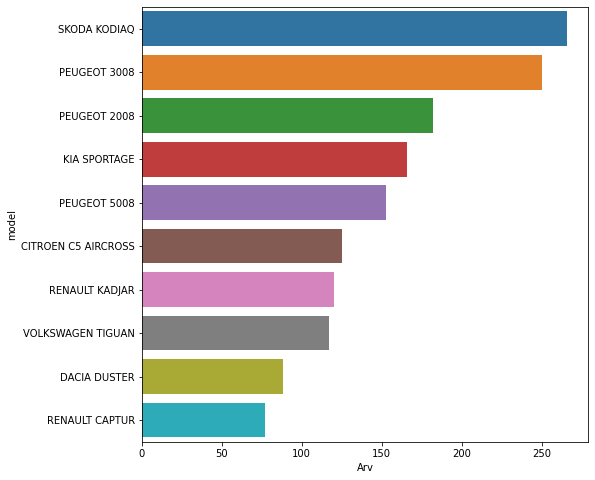

In [156]:
df_diesel_suv = df_diesel[df_diesel['SUV']]

group_sort_and_plot(df_diesel_suv, ['model'])

                                     full model  Arv
1          PEUGEOT 3008(DIISEL, 1.5 cm3, 96 kW)  249
2         SKODA KODIAQ(DIISEL, 2.0 cm3, 110 kW)  176
3          PEUGEOT 2008(DIISEL, 1.5 cm3, 96 kW)  151
4          PEUGEOT 5008(DIISEL, 1.5 cm3, 96 kW)  148
5         KIA SPORTAGE(DIISEL, 1.6 cm3, 100 kW)  131
6        RENAULT KADJAR(DIISEL, 1.5 cm3, 85 kW)  117
7   CITROEN C5 AIRCROSS(DIISEL, 1.5 cm3, 96 kW)  111
8    VOLKSWAGEN TIGUAN(DIISEL, 2.0 cm3, 110 kW)  108
9          DACIA DUSTER(DIISEL, 1.5 cm3, 85 kW)   78
10       RENAULT CAPTUR(DIISEL, 1.5 cm3, 85 kW)   77


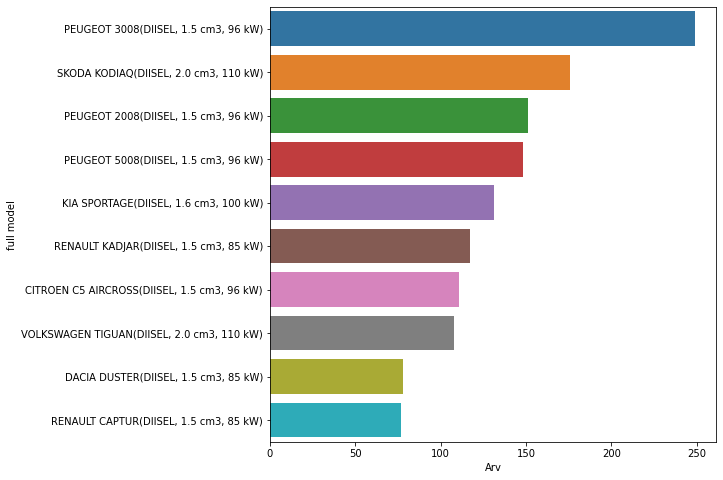

In [157]:
group_sort_and_plot(df_diesel_suv, ['full model'])

### Top 10 popular Petrol SUV

             model  Arv
1      TOYOTA RAV4  864
2     SKODA KODIAQ  270
3      SKODA KAROQ  245
4   RENAULT CAPTUR  239
5     DACIA DUSTER  239
6     KIA SPORTAGE  231
7   RENAULT MEGANE  213
8      SKODA KAMIQ  209
9   HYUNDAI TUCSON  209
10  NISSAN QASHQAI  196


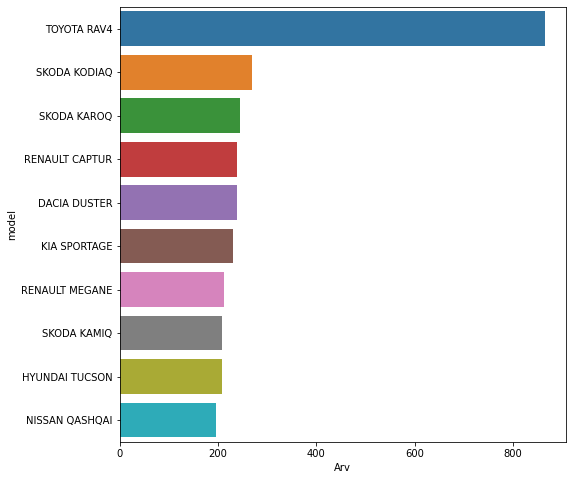

In [158]:
df_petrol_suv = df_petrol[df_petrol['SUV']]

group_sort_and_plot(df_petrol_suv, ['model'])

                                           full model  Arv
1   TOYOTA RAV4(BENSIIN_KATALYSAATOR, 2.0 cm3, 129...  864
2   SKODA KAROQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 110...  231
3   SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...  189
4   HYUNDAI TUCSON(BENSIIN_KATALYSAATOR, 1.6 cm3, ...  176
5   RENAULT MEGANE(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  174
6   KIA SPORTAGE(BENSIIN_KATALYSAATOR, 1.6 cm3, 13...  160
7   DACIA DUSTER(BENSIIN_KATALYSAATOR, 1.0 cm3, 74...  150
8   RENAULT CAPTUR(BENSIIN_KATALYSAATOR, 1.0 cm3, ...  142
9   HONDA CR-V(BENSIIN_KATALYSAATOR, 1.5 cm3, 142 kW)  135
10  NISSAN QASHQAI(BENSIIN_KATALYSAATOR, 1.3 cm3, ...  123


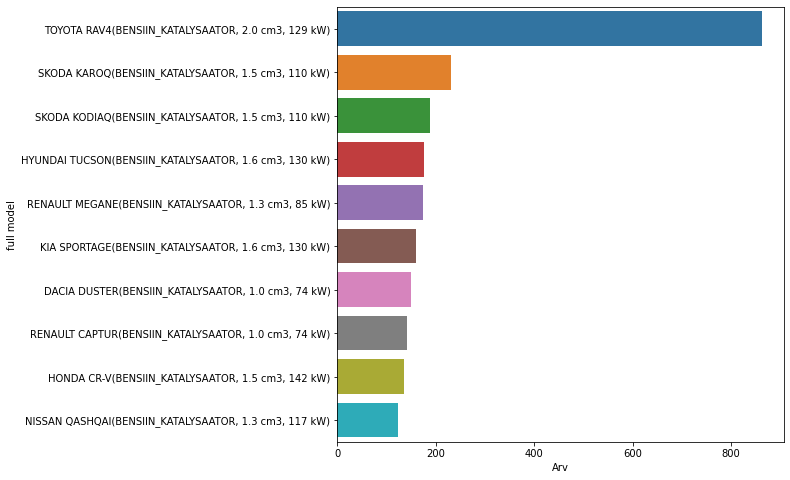

In [159]:
group_sort_and_plot(df_petrol_suv, ['full model'])

### Top 10 popular hybrid SUV

              model  Arv
1       TOYOTA RAV4  536
2       TOYOTA C-HR  211
3        HONDA CR-V  115
4   SUBARU FORESTER   77
5        VOLVO XC60   59
6        VOLVO XC90   45
7       MAZDA CX-30   40
8           AUDI Q7   39
9          KIA NIRO   26
10          AUDI Q3   22


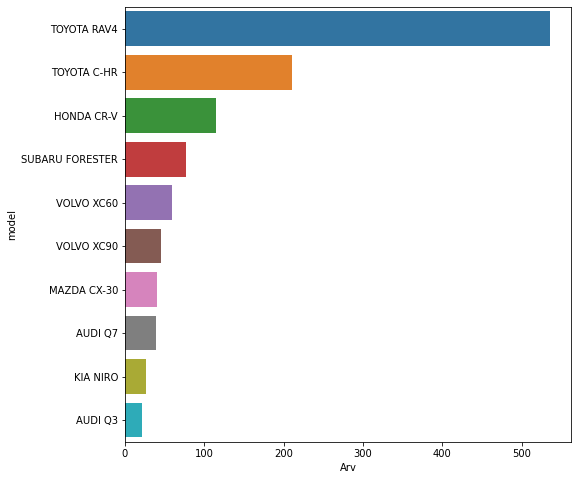

In [160]:
df_hybrid_suv = df_hybrids[df_hybrids['SUV']]

group_sort_and_plot(df_hybrid_suv, ['model'])

                                           full model  Arv
1       TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)  536
2        TOYOTA C-HR(BENSIIN_HYBRIID, 1.8 cm3, 72 kW)  186
3        HONDA CR-V(BENSIIN_HYBRIID, 2.0 cm3, 107 kW)  115
4   SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)   77
5            AUDI Q7(DIISEL_HYBRIID, 3.0 cm3, 210 kW)   39
6         VOLVO XC90(DIISEL_HYBRIID, 2.0 cm3, 173 kW)   35
7         VOLVO XC60(DIISEL_HYBRIID, 2.0 cm3, 145 kW)   30
8           KIA NIRO(BENSIIN_HYBRIID, 1.6 cm3, 77 kW)   26
9       TOYOTA C-HR(BENSIIN_HYBRIID, 2.0 cm3, 112 kW)   25
10      MAZDA CX-30(BENSIIN_HYBRIID, 2.0 cm3, 132 kW)   22


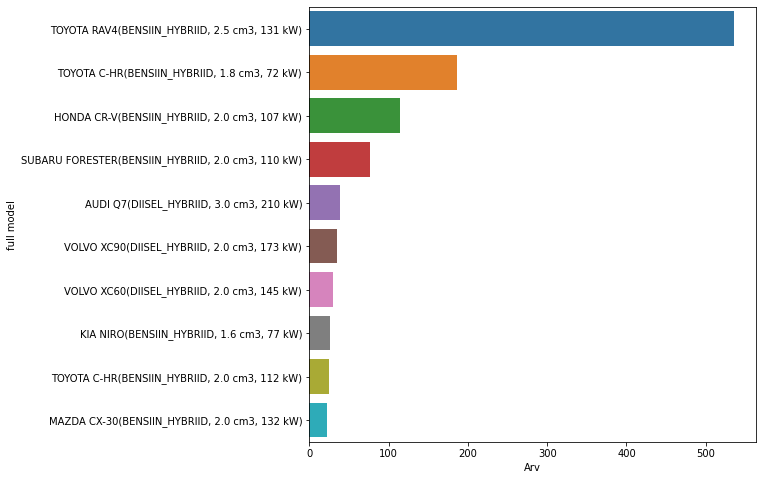

In [161]:
group_sort_and_plot(df_hybrid_suv, ['full model'])

### Most popular models per city

In [162]:
# Popular car per each city
data = df
data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)
cities = data['Linn'].tolist()

cities = set([city if "linn" in city else city + " linn" for city in cities])

for city in sorted(cities):
    print()
    print(city)
    group_sort_and_plot(data[data['Linn'] == city], ['full model'], limit=3, plot=False)


Haapsalu linn
                                         full model  Arv
1   SUBARU XV(BENSIIN_KATALYSAATOR, 1.6 cm3, 84 kW)    3
2  KIA XCEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)    2
3   KIA CEED(BENSIIN_KATALYSAATOR, 1.4 cm3, 103 kW)    2

Keila linn
                                      full model  Arv
1         SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)    3
2             SKODA OCTAVIA(CNG, 1.5 cm3, 96 kW)    3
3  TOYOTA RAV4(BENSIIN_HYBRIID, 2.5 cm3, 131 kW)    2

Kohtla-Järve linn
                                          full model  Arv
1  SKODA KODIAQ(BENSIIN_KATALYSAATOR, 1.5 cm3, 11...    4
2             SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)    4
3  SUBARU OUTBACK(BENSIIN_KATALYSAATOR, 2.5 cm3, ...    4

Loksa linn
                                          full model  Arv
1             SKODA OCTAVIA(DIISEL, 2.0 cm3, 110 kW)    1
2  SUBARU FORESTER(BENSIIN_HYBRIID, 2.0 cm3, 110 kW)    1
3  SUZUKI VITARA(BENSIIN_KATALYSAATOR, 1.4 cm3, 1...    1

Maardu linn
                     

/tmp/ipykernel_228482/1520971205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.replace('Narva- Jõesuu','Narva-Jõesuu', inplace=True)


# Top 3 for each mark

In [163]:
marks = ['ALFA ROMEO', 'ALPINE', 'ASTON MARTIN', 
         'AUDI', 'BENTLEY', 'BMW', 'BMW I', 
         'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'CITROEN', 
         'DACIA', 'DODGE', 'DS', 'FERRARI', 'FIAT', 'FORD', 
         'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA', 
         'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LOTUS', 'MASERATI', 
         'MAZDA', 'MERCEDES-AMG', 'MERCEDES-BENZ', 'MINI', 
         'MITSUBISHI', 'NISSAN', 'OPEL', 'PEUGEOT', 
         'PORSCHE', 'RENAULT', 'SEAT', 'SKODA', 'SSANGYONG', 
         'SUBARU', 'SUZUKI', 'TESLA MOTORS', 'TOYOTA', 'VOLKSWAGEN', 'VOLVO']

for mark in marks:
    models = df[df['Mark'] == mark]
    if not models.empty:
        print("Top 3 {} models".format(mark))
        group_sort_and_plot(models, ['model'], limit=3, plot=False)
        print()


Top 3 ALFA ROMEO models
                       model  Arv
1         ALFA ROMEO STELVIO   10
2          ALFA ROMEO GIULIA    4
3  ALFA ROMEO ALFA GIULIETTA    1

Top 3 AUDI models
               model  Arv
1  AUDI Q3 SPORTBACK  164
2            AUDI Q3   69
3            AUDI Q7   39

Top 3 BENTLEY models
                       model  Arv
1        BENTLEY FLYING SPUR    4
2  BENTLEY CONTINENTAL GT V8    3
3        BENTLEY BENTAYGA V8    2

Top 3 BMW models
               model  Arv
1  BMW X5 XDRIVE 30D   55
2  BMW X1 SDRIVE 18I   31
3  BMW X6 XDRIVE 30D   24

Top 3 CHRYSLER models
               model  Arv
1  CHRYSLER PACIFICA    9

Top 3 CITROEN models
                 model  Arv
1     CITROEN BERLINGO  601
2           CITROEN C3  216
3  CITROEN C3 AIRCROSS  135

Top 3 DACIA models
           model  Arv
1   DACIA DUSTER  327
2  DACIA SANDERO  276
3    DACIA LODGY   50

Top 3 DODGE models
              model  Arv
1     DODGE DURANGO    5
2  DODGE CHALLENGER    2
3     DODGE CHARGER    2
